In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# yfinance로 ohlcv 데이터 불러옴
samsung_df = yf.download('005930.KS', start='2000-01-01')

# 데이터 전처리
# 주말이랑 휴장일을 뺌
samsung_df['day_of_week'] = samsung_df.index.dayofweek
samsung_df['weekend'] = np.where(samsung_df['day_of_week'] >= 5, 1, 0)
samsung_df.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,day_of_week,weekend
Date,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.110352,74195000,1,0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.548828,74680000,2,0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250977,54390000,3,0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.845215,40305000,4,0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.636230,46880000,0,0
2000-01-11,5820.0,6100.0,5770.0,5770.0,4284.636230,59745000,1,0
2000-01-12,5610.0,5740.0,5600.0,5720.0,4247.506348,29220000,2,0
2000-01-13,5600.0,5740.0,5560.0,5710.0,4240.081543,41190000,3,0
2000-01-14,5720.0,5880.0,5680.0,5830.0,4329.190918,49375000,4,0


In [53]:
# 학습과 테스트 데이터 세트를 분리해 학습과 예측 수행
y = samsung_df['Close']

X = samsung_df.drop(['Close','day_of_week','weekend','Low','High','Open','Volume'],axis=1,inplace = False)

# train set 7  대 test set 3, random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위한 난수 값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)


In [54]:
# sklearn 사용하여 선형 회귀 모델 구하기
lr = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.01)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# 테스트셋의 날짜도 랜덤으로 뽑아서 시각화하기 위해 날짜로 미리 정렬했는데 문제가 있을까? 일단 없는 것 같음
X_test = X_test.sort_index()

In [55]:
# 예측 수행
y_pred = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# 평가 지표
# MSE실제 값과 예측 : 값의 차이를 제곱해서 평균
# RMSE : MSE에 루트를 씌운 것 
# r2 : 분산 기반으로 예측 성능 평가. 1에 가까울수록 예측 정확도 높음
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test,y_pred)
print("---------------------------")
print("선형 회귀")
print('MSE', mse)
print('RMSE:', rmse)
print('Variance score(r2):', r2)
print("---------------------------")

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge= r2_score(y_test,y_pred_ridge)
print("Ridge")
print('MSE', mse_ridge)
print('RMSE:', rmse_ridge)
print('Variance score(r2):', r2_ridge)
print("---------------------------")

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso= r2_score(y_test,y_pred_lasso)
print("Lasso")
print('MSE', mse_lasso)
print('RMSE:', rmse_lasso)
print('Variance score(r2):', r2_lasso)
print("---------------------------")

# 값 봐라... 이게 음수가 나올 수 있는 건가? 쨌던 회귀는 쓸만한 모델이 아니다!!

---------------------------
선형 회귀
MSE 775846103.2523437
RMSE: 27854.01413176104
Variance score(r2): -0.8858825548792708
---------------------------
Ridge
MSE 775846103.2484126
RMSE: 27854.014131690474
Variance score(r2): -0.8858825548697153
---------------------------
Lasso
MSE 775846103.234368
RMSE: 27854.01413143836
Variance score(r2): -0.8858825548355764
---------------------------


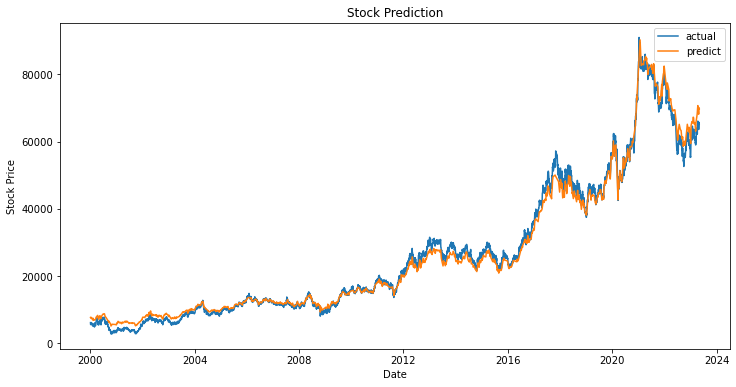

In [56]:
# 시각화 
plt.figure(figsize=(12,6))
plt.plot(samsung_df.index, samsung_df['Close'], label='actual')
plt.plot(X_test.index, y_pred, label='predict')
plt.title("Stock Prediction")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 결론 : 추세 정도는 확인 가능... 딴 모델 찾자...